# 회귀분석 연습문제 (1) 
## 문제 1





In [22]:

import pandas as pd
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns
import sys
import os 
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r



In [23]:
df = pd.read_excel("https://data.hossam.kr/E04/beans.xlsx")
df


,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


## 탐색적 데이터 분석

### 산점도 그래프


In [24]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

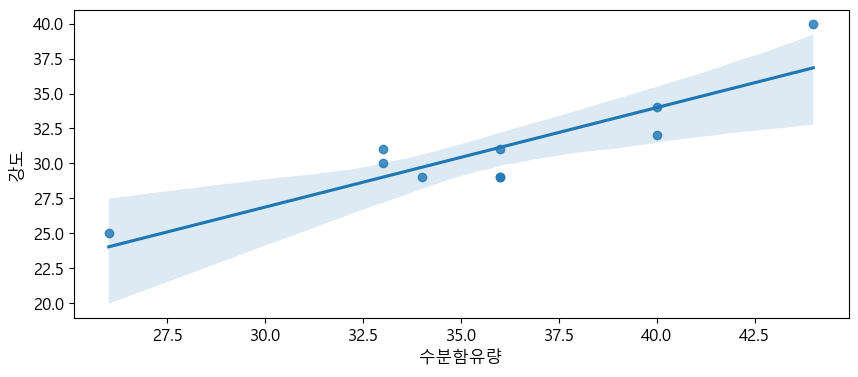

In [25]:
sns.regplot(data=df,x='수분함유량',y='강도')
plt.show()
plt.close()

## 추론통계 

### 1) 상관분석



In [26]:
rdf = pearson_r(df)

In [27]:
rdf

,statistic,pvalue,result
fields,,,
수분함유량vs강도,0.888052,0.000599,True
강도vs수분함유량,0.888052,0.000599,True


상관분석 결과 p값이 0.05보다 작으므로 수분함유량에 따른 강도의 차이가 있는것으로 결론 지을 수 있다.

### 2) 회귀분석

In [28]:
model = ols('강도 ~ 수분함유량',data=df)
fit = model.fit()
fit.summary()


c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     강도   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     29.85
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           0.000599
Time:                        14:38:26   Log-Likelihood:                -19.614
No. Observations:                  10   AIC:                             43.23
Df Residuals:                       8   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4991      4.707      1.168      0.276      -5.355      16.353
수분함유량          0.7123      0.130      5.463      0.001       0.412       1.013
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.530
Skew:                           0.264   Prob(JB):                        0.767
Kurtosis:                       2.004   Cond. No.                         280.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 분석 결과 해석

R-squared : 0.789
 
 -> 모델의 정확도를 나타내는 지표 -> 강도의 78.9%를 수분함유량이 설명

Adj R-squared  : 0.762 
 
 -> 독립변수가 많아 질수록 과적합 되는 현상을 방지하기 위해 수정된 r값임. 독립변수가 하나기 때문에 해석 x 

F-statistic : 29.85 
 
 -> F값이 29.85로, 유의수준 0.05에서  F(1,8) 보다 크므로 회귀계수가 0이라는 귀무가설을 기각

AIC BIC : 43.23, 43.83
 
 -> 모델의 적합성을 고려하는 지표 낮을수록 좋음

회귀계수 해석 
- 절편 : 5.4991
- 기울기 : 0.7123

기울기의 p값 : 0.001
 
 
-> 회귀계수의 p값이 유의수준 0.05보다 작으므로 통계적으로 유의하다. 

## 결과 보고 

### 모형 적합도 보고

F분포의 파라미터 2개와 그떄의 F값, p값의 유의수준 비교를 명시

수분함유량의 변화에 따른 강도의 변화를 예측하는 회귀분석을 실시한 결과를 확인했고 F검정을 통해 회귀모형에 대한 검정을 한 결과 회귀모형은 통계적으로 유의했다. 
### 독립변수에 대해 보고

수분함유량의 회귀계수는 0.7123으로, 회귀계수에 대한 p 값을 확인한 결과 통계적으로 유의미한 예측변인인 것을 확인했다.

## 문제 (2) 
아래의 데이터는 10년간 에어컨의 예약대수에 따른 실 판매대수를 조사한 가상의 데이터이다.

### 요구사항
- 위 데이터를 분석하고 결과를 보고하시오.
- 기록적인 폭염으로 올해 에어컨 예약 대수는 150대였다. 실 판매대수를 예측하시오.


In [29]:
## https://data.hossam.kr/E04/aircon.xlsx

In [30]:

import pandas as pd
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns
import sys
import os 
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r


In [31]:
df = pd.read_excel("https://data.hossam.kr/E04/aircon.xlsx")
df.head()

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50


### 탐색적 데이터 분석 
#### 산점도 그래프

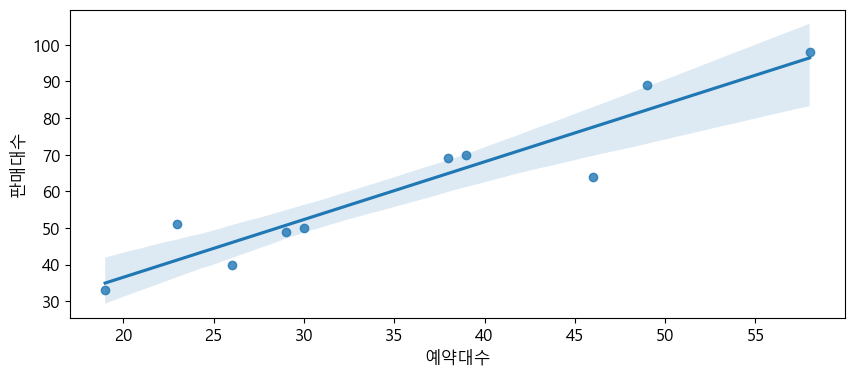

In [32]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

sns.regplot(data=df,x='예약대수',y='판매대수')
plt.show()
plt.close()

### 추론통계
#### 1) 상관분석 시행


In [33]:
rdf = pearson_r(df)
rdf

,statistic,pvalue,result
fields,,,
예약대수vs판매대수,0.946913,0.000033,True
판매대수vs예약대수,0.946913,0.000033,True


##### 결과해석

: 상관분석 결과 상관계수가 0.9769인 것을 보아 상관관계가 매우 높아 보이고 이에 대해 유의수준 0.05에서 검정한 결과 p값이 0.05보다 작은것을 확인. 따라서 예약대수와 판매대수에 따라 통계적으로 유의한 차이가 있다 .

### 2) 회귀분석 

In [34]:
model = ols("판매대수 ~ 예약대수",data=df)
fit = model.fit()
fit.summary()


c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   판매대수   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.40
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           3.26e-05
Time:                        14:38:30   Log-Likelihood:                -32.667
No. Observations:                  10   AIC:                             69.33
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0689      7.113      0.713      0.496     -11.333      21.471
예약대수           1.5751      0.189      8.331      0.000       1.139       2.011
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   2.910
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.497
Skew:                          -0.541   Prob(JB):                        0.780
Kurtosis:                       2.849   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3) 분석결과 해석

R-squared : 0.897
 -> 모형의 설명력을 나타내는 지표 -> 판매대수의 89.7% 를 예약대수가 설명
Adj R-squared  : 0.884
-> 독립변수의 갯수가 많아짐에 따라 과적합되는 현상을 방지하기 위한 수정된 R값임. 
F-statistic : 69.4
-> F값이 69.4로 F(1,8)보다 ㅋ크므로 회귀모델은 통계적으로 유의함. 예약대수에 따라 판매대수가 차이가 있다.
AIC BIC : 69.33 , 69.94

회귀계수 해석 
- 절편 : 5.0689
- 기울기 : 1.5751

기울기의 p값 : 0.000
 
-> 회귀계수의 p값이 유의수준 0.05보다 작으므로 회귀식의 기울기는 통계적으로 유의하다. 

### 판매대수 예측

회귀식 : y = 1.57515x + 5.0688

In [35]:
x= 150
y =  1.57515 * x + 5.0688
print("에어컨 판매대수 예측값 : ",y)

에어컨 판매대수 예측값 :  241.34130000000002


## 문제(3) 
아래의 데이터는 부모의 키에 따른 자식의 키를 조사한 데이터이다.

- 위 데이터를 분석하고 결과를 보고하시오.
- 당신이 자식을 낳는다면 키가 어느정도일지 예측해 보시오.

In [36]:
## https://data.hossam.kr/E04/galton.xlsx

## 데이터 가져오기 


In [37]:
df = pd.read_excel("https://data.hossam.kr/E04/galton.xlsx")
df

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


## 탐색적 데이터 분석

### 산점도 그래프

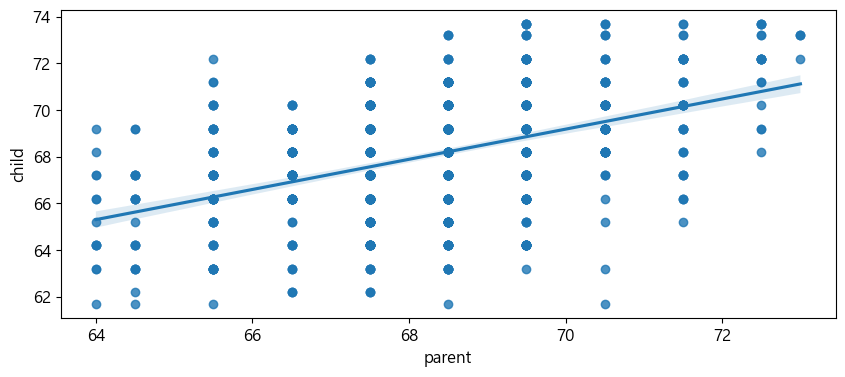

In [38]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

sns.regplot(data=df,x='parent',y='child')
plt.show()
plt.close()

## 추론 통계 

### 1) 상관분석 

In [39]:
rdf = pearson_r(df)
rdf

,statistic,pvalue,result
fields,,,
childvsparent,0.458762,1.732509e-49,True
parentvschild,0.458762,1.732509e-49,True


#### 결과해석

부모의 키에 따른 자식의 키의 상관정도는 0.458762 로 나타났고, p값이 0.05보다 작은 것을 고려하면 부모의 키에 따른 자식의 키가 차이가 있다는 것을 ㅗ학인할 수 있다.

### 2) 회귀분석

In [40]:
model = ols('child ~ parent',data=df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  child   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     246.8
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.73e-49
Time:                        14:38:31   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9415      2.811      8.517      0.000      18.425      29.458
parent         0.6463      0.041     15.711      0.000       0.566       0.727
==============================================================================
Omnibus:                       11.057   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.944
Skew:                          -0.241   Prob(JB):                      0.00420
Kurtosis:                       2.775   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


R-squared : 

 -> 모델의 설명력을 나타내는 지표 : 0.210 으로 낮은편

Adj R-squared  : 0.210 
 
 -> 독립변수가 많아 질수록 과적합 되는 현상을 방지하기 위해 수정된 r값임. 독립변수가 하나기 때문에 해석 x 

F-statistic : 246.8
 
 -> F값이 246.8로, 유의수준 0.05에서  F(1,926) 보다 크므로 회귀계수가 0이라는 귀무가설을 기각

 -> 부모의 키에 따른 자식의 키의 변ㄴ화가 있다는 것은 통계적으로 유의하지만 모델의 설명력을 보면 예측의 정확성은 낮을 것을 확인 할 수 있음.

AIC BIC : 4131, 4141
 
 -> 모델의 적합성을 고려하는 지표 낮을수록 좋음

회귀계수 해석 
- 절편 : 23.9415
- 기울기 : 0.6463

기울기의 p값 : 0.000
 
 
-> 회귀계수의 p값이 유의수준 0.05보다 작으므로 통계적으로 유의하다. 기울기가 0은 아님 

### 자식의 키 예측

회귀식 y = 0.6463 * x + 23.9415

In [41]:
x = 170
y = 0.6463 * x + 23.9415
print("예측 자식의 키 : ",y)

예측 자식의 키 :  133.8125


In [44]:
fit.predict({"parent":[68.8976]})

b,a = fit.params
b

23.94153018041459